<div align="center">

# University of Crete
# Department of Applied Mathematics

## MEM-264: Applied Statistics
### Spring Semester 2022-2023
#### Authors:
#### Theodoros Chalkidis, csd4198@csd.uoc.gr
#### George Manos, csd4333@csd.uoc.gr
#### Christos Zarkos csd4516@csd.uoc.gr

## Imports

In [46]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Read Data

In [47]:
full_df = pd.read_csv('../data/movie_revenues.csv')
full_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Data Preparation

Choose the desired predictors, construct more features prior to model training

In [48]:
famous_directors = ["David Fincher", "Martin Scorsese", "Quentin Tarantino", "Christopher Nolan", "Peter Jackson", "Tim Burton", "Clint Eastwood", "James Cameron", "Francis Ford Coppola", "Steven Spielberg"]

famous_actors = ["Jack Nicholson", "Marlon Brando", "Robert De Niro", "Al Pacino", "Daniel Day-Lewis", "Dustin Hoffman", "Tom Hanks", "Paul Newman", "Denzel Washington", "Harrison Ford", "Brad Pitt", "George Clooney", "Matt Damon", "Gerard Butler", "Leonardo DiCaprio", "Tom Cruise", "Christian Bale", "Robert Downey Jr.", "Audrey Hepburn", "Meryl Streep", "Cate Blanchett", "Julianne Moore", "Jodie Foster", "Shirley MacLaine", "Susan Sarandon", "Jane Fonda", "Judi Dench", "Gwyneth Paltrow", "Angelina Jolie", "Kate Winslet", "Hilary Swank", "Helena Bonham Carter", "Nicole Kidman", "Uma Thurman"]
famous_companies = ['Disney', 'Marvel', 'Warner Bros.', 'Universal Pictures', 'Paramount Pictures', '20th Century Fox', 'Columbia Pictures', 'DreamWorks', 'Miramax', 'New Line Cinema', 'Pixar', 'Sony Pictures', 'Touchstone Pictures', 'United Artists', 'Village Roadshow Pictures' ,'Metro-Goldwyn-Mayer (MGM)' , 'Lionsgate' , 'Summit Entertainment' , 'Castle Rock Entertainment']

genre_scores =    {
 'Action': 5,
 'Adventure': 5,
 'Fantasy': 5,
 'Science Fiction': 5,

 'Animation': 4,
 'Comedy': 4,

 'Drama': 3,
 'Thriller': 3,
 'Crime': 3,

 'Mystery': 2,
 'Romance': 2,

 'War': 1,
 'Family': 1,
 'History': 1,
 'Western': 1,
 'Horror': 1,
 'Documentary': 1,
 'Music': 1,
 'Foreign': 1,
 'TV Movie': 1
 }

In [49]:
outp = full_df["genres"].dropna().apply(lambda x: eval(str(x))).apply(lambda x: x[0]['name']).unique()
outp

array(['Comedy', 'Drama', 'Thriller', 'Action', 'Animation', 'Horror',
       'Documentary', 'Adventure', 'Crime', 'Mystery', 'Fantasy', 'War',
       'Science Fiction', 'Romance', 'Music', 'Western', 'Family',
       'History', 'Foreign', 'TV Movie'], dtype=object)

In [50]:
full_df['is_english'] = (full_df['original_language'] == 'en').astype(int)
full_df['is_holiday'] = full_df['release_date'].apply(lambda x: int(x.split("/")[0])).map(lambda x: 1 if 5 <= x <= 8 or 11 <= x <= 12 else 0)
full_df['movie_age'] = full_df['release_date'].apply(lambda x: int(x.split("/")[2])).apply(lambda x: 23 - x if x <= 23 else 123 - x)
full_df['actor_score'] = full_df['cast'].apply(lambda x: sum(i in str(x) for i in famous_actors))
full_df['director_score'] = full_df['crew'].apply(lambda x: sum(i in str(x) for i in famous_directors))
full_df['company_score'] = full_df['production_companies'].apply(lambda x: sum(i in str(x) for i in famous_companies))
full_df['genre_score'] = full_df["genres"].dropna().apply(lambda x: eval(str(x))).apply(lambda x: x[0]['name']).map(genre_scores)

# Make sure revenue is the last variable here as it is the target!
variables = ['budget', 'is_english', 'runtime', 'popularity', 'genre_score', 'is_holiday', 'movie_age', 'actor_score', 'director_score', 'company_score', 'revenue']
df = full_df[variables].dropna()
target = 'revenue'
print(df.shape)
df.head()

(2991, 11)


,budget,is_english,runtime,popularity,genre_score,is_holiday,movie_age,actor_score,director_score,company_score,revenue
0,14000000,1,93.0,6.575393,4.0,0,8,0,0,3,12314651
1,40000000,1,113.0,8.248895,4.0,1,19,0,0,1,95149435
2,3300000,1,105.0,64.299990,3.0,0,9,0,0,0,13092000
3,1200000,0,122.0,3.174936,3.0,0,11,0,0,0,16000000
4,0,0,118.0,1.148070,5.0,0,14,0,0,0,3923970


Note: `.dropna()` drops columns with NaN values. We can probably address this issue in better ways (i.e. mean imputation etc)

## Train Model

// Comment: De kserw an prepei na kanoume regression opws edeikse stis dialekseis h apla na paroume etoimh function. Pros to paron pairnw etoimh, esteila mail gia confirmation :)

In [51]:
x = df.drop(target, axis='columns')
y = df[target]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

## Compute R^2

In [52]:
y_mean = df[target].mean()
y_hat = model.predict(x)
y = df[target]
SS_res = sum((y - y_hat)**2)
SS_tot = sum((y - y_mean)**2)

R_squared = 1 - (SS_res / SS_tot)
n, p = df.drop(target, axis='columns').shape
print(f'Number of Predictors: {p}\nn: {n}')
R_adj = 1 - ((SS_res / SS_tot) * ((n - 1) / (n - p - 1)))

print(f'R^2: {R_squared}\nR^2_adj: {R_adj}')

Number of Predictors: 10
n: 2991
R^2: 0.6196896104590688
R^2_adj: 0.6184134010981931


## Check multiple linear regression model conditions

### 1) Nearly normal residuals

We do a histogram of the frequency of the residuals and check if they appear to be nearly normally distributed

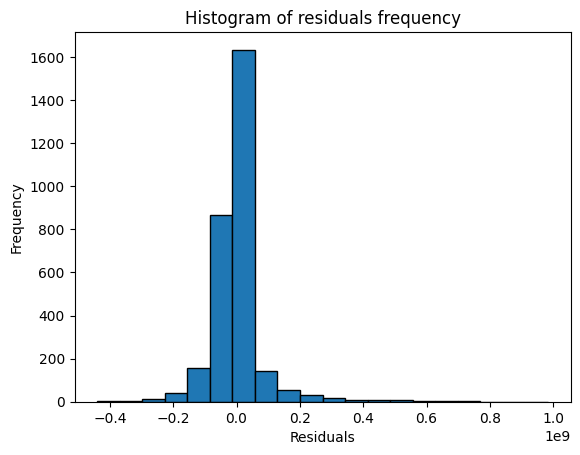

In [53]:
residuals = y - y_hat
plt.hist(residuals, bins=20, edgecolor='black')

plt.title('Histogram of residuals frequency')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### 2) Constant variability in residuals

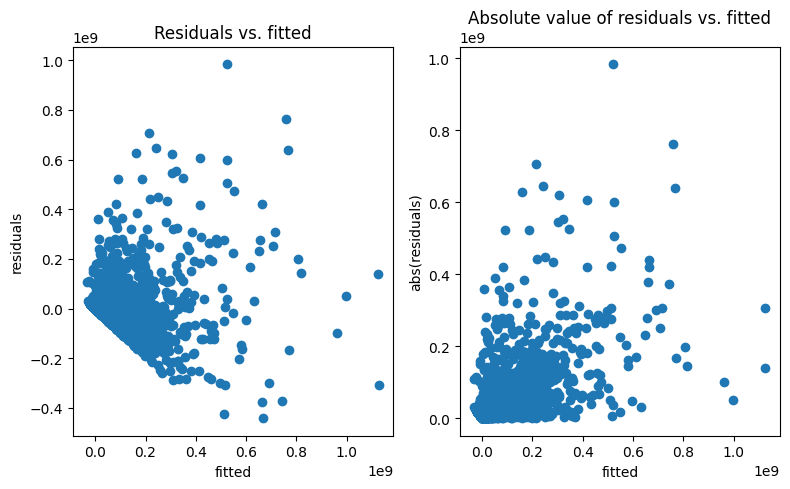

In [54]:
abs_residuals = abs(residuals)

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.scatter(y_hat, residuals)
plt.xlabel('fitted')
plt.ylabel('residuals')
plt.title('Residuals vs. fitted')
plt.tight_layout()

plt.subplot(1,2,2)
plt.scatter(y_hat, abs_residuals)
plt.xlabel('fitted')
plt.ylabel('abs(residuals)')
plt.title('Absolute value of residuals vs. fitted')
plt.tight_layout()

plt.show()

### 3) Independence of residuals
Since our sample is independent our residuals will be too.

### 4) Each variable linearly related to the outcome

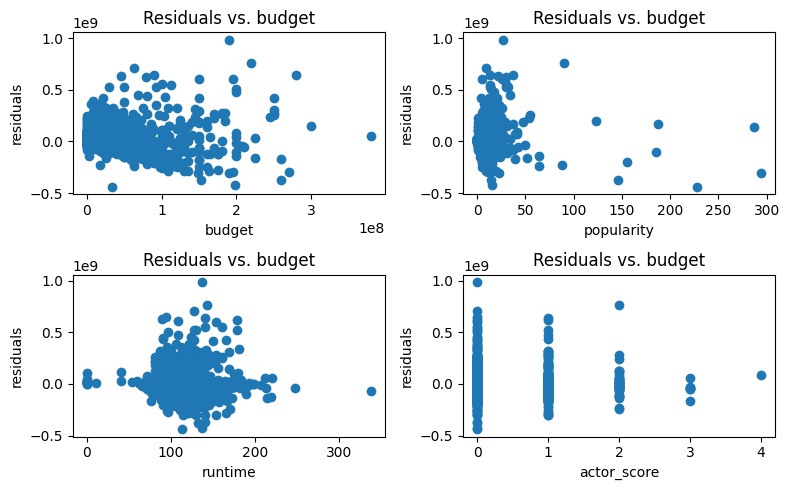

In [55]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.scatter(df['budget'], residuals)
plt.xlabel('budget')
plt.ylabel('residuals')
plt.title('Residuals vs. budget')
plt.tight_layout()

plt.subplot(2,2,2)
plt.scatter(df['popularity'], residuals)
plt.xlabel('popularity')
plt.ylabel('residuals')
plt.title('Residuals vs. budget')
plt.tight_layout()

plt.subplot(2,2,3)
plt.scatter(df['runtime'], residuals)
plt.xlabel('runtime')
plt.ylabel('residuals')
plt.title('Residuals vs. budget')
plt.tight_layout()

plt.subplot(2,2,4)
plt.scatter(df['actor_score'], residuals)
plt.xlabel('actor_score')
plt.ylabel('residuals')
plt.title('Residuals vs. budget')
plt.tight_layout()

plt.show()

## Check the slope associated with the Budget Variable

In [56]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     485.6
Date:                Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:59:31   Log-Likelihood:                -58851.
No. Observations:                2991   AIC:                         1.177e+05
Df Residuals:                    2980   BIC:                         1.178e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.759e+07   1.05e+07     -2.

## Find significant variables for predicting movie revenue

We noticed that the condition number is large, which might indicate that there are strong multicollinearity problems between the variables. For this purpose we chose to deploy forward selection and backward elimination algorithms to select the most significant variables for predicting movie revenue.

## Step 1: Define statistical test

In [57]:
from causallearn.utils.cit import CIT

def stat_test(D, V_idx, T_idx, S=None):
    chi_obj = CIT(D, "fisherz")  # construct a Chi-Squared Test instance with data and method name
    pValue = chi_obj(V_idx, T_idx, S)
    return pValue

ModuleNotFoundError: No module named 'causallearn'

## Step 2: Define Forward Selection and Backward Deletion Algorithms

In [34]:
def forward_selection(D, V_indices, T_idx, a, S=None):
    """
    Forward Selection algorithm. Fills up set S with variables that are
    highly correlated to the target variable.
    :param D: Full Dataset
    :param V_indices: Variable column indices
    :param T_idx: Target variable column index
    :param S: Previously selected Variables (optional)
    :param a: Significance Threshold
    :return S: Selected Variables
    """
    flag = True
    if S is None:
        S = set()
        R = V_indices
    else:
        R = V_indices.drop(S)
    while flag:
        flag = False
        V_star, p_value = min(
            [
                (V_idx, stat_test(D=D.values, V_idx=V_idx, T_idx=T_idx, S=S))
                for V_idx in R
            ],
            key=lambda x: x[1],
        )
        R = R.drop(V_star)
        if p_value <= a:
            S.add(V_star)
            flag = True
    return S

def backward_elimination(D, T_idx, S, a):
    """
    Backward Elimination algorithm. Essentially discards variables from set S that
    are not important to the target index, given the rest of the set S.
    :param D: Full Dataset
    :param T_idx: Target variable index
    :param S: Previously Selected Variables
    :param a: Significance Threshold
    :return S: Selected Variables
    """
    flag = len(S) > 0
    while flag:
        flag = False
        V_star, p_value = max(
            [
                (
                    V_idx,
                    stat_test(
                        D=D.values, V_idx=V_idx, T_idx=T_idx, S=S.difference({V_idx})
                    ),
                )
                for V_idx in S
            ],
            key=lambda x: x[1],
        )
        if p_value > a:
            S.remove(V_star)
            flag = True
    return S

## Step 3: Apply Separately Forward and Backward Algorithms

Forward Selection:

In [35]:
a = 0.05 # significance level

# Remove column names to apply feature selection
df.columns = range(df.shape[1])

x_cols = df.columns[:-1]
y_col = df.columns[-1]

In [36]:
forward_selected_vars = forward_selection(D=df, V_indices=x_cols, T_idx=y_col, a=a)
forward_selected_vars = [variables[i] for i in forward_selected_vars]
forward_selected_vars

['budget', 'popularity', 'is_holiday', 'movie_age', 'director_score']

Backward Elimination:

In [37]:
backward_selected_vars = backward_elimination(D=df, T_idx=y_col, S = set(x_cols), a=a)
backward_selected_vars = [variables[i] for i in backward_selected_vars]
backward_selected_vars

['budget', 'popularity', 'is_holiday', 'movie_age', 'director_score']

## Extra step 4: Apply Forward-Backward variable selection

We may also apply forward-backward feature selection algorithm, where you essentially apply forward selection to the full dataset and backward elimination on the selected variables of the forward step, to also see our results

In [38]:
S = forward_selection(D=df, V_indices=x_cols, T_idx=y_col, a=a)
selected_vars = backward_elimination(D=df, T_idx=y_col, S=S, a=a)
selected_vars = [variables[i] for i in selected_vars]
selected_vars

['budget', 'popularity', 'is_holiday', 'movie_age', 'director_score']